# Data availability

In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

In [3]:
current_path = os.getcwd()
parent_path = os.path.dirname(current_path)
result_path = os.path.join(parent_path, 'database', 'HF entries', 'hf extracted json')

## LLMs

In [2]:
# Read JSON and count available attributes

def models_statistics(file_name):

	name_count = 0
	version_count = 0
	number_of_parameters_count = 0
	quantization_count = 0
	architecture_count = 0
	languages_count = 0
	model_creator_count = 0
	license_count = 0
	library_count = 0
	context_length_count = 0
	developers_count = 0
	open_source_count = 0
	uri_count = 0
	finetuned_count = 0
	carbon_emission_count = 0
	tokenizer_count = 0
	likes_count = 0
	downloads_count = 0

	models_json = open(os.path.join(result_path, file_name))
	models_data_json = json.load(models_json)

	models_df = pd.DataFrame(models_data_json) 

	# TODO: add more attributes (?)
	for idx, item in enumerate(models_data_json):
		if item['name'] is not None:
			name_count += 1
		if item['version'] is not None:
			version_count += 1
		if item['numberOfParameters'] is not None:
			number_of_parameters_count += 1
		if item['quantization'] is not None:
			quantization_count += 1
		if item['architecture'] is not None:
			architecture_count += 1
		if len(item['languages']) > 0:
			languages_count += 1
		if item['modelCreator'] is not None:
			model_creator_count += 1
		if item['licenseToUse'] is not None:
			license_count += 1
		if len(item['libraryFramework']) > 0:
			library_count += 1
		if item['contextLength'] is not None:
			context_length_count += 1
		if len(item['developers']) > 0:
			developers_count += 1
		if item['openSource'] is not None:
			open_source_count += 1
		if item['uri'] is not None:
			uri_count += 1
		if item['fineTuned'] is not None:
			finetuned_count += 1
		if item['carbonEmission [CO2eq tons]'] is not None:
			carbon_emission_count += 1
		if item['tokenizer'] is not None:
			tokenizer_count += 1
		if item['likes'] is not None:
			likes_count += 1
		if item['downloads'] is not None:
			downloads_count += 1
	
	total_models = idx + 1

	print(f'Number of processed models: {total_models}')
	print(f'    Name: {name_count} ({(name_count / total_models) * 100:.2f}%)')
	print(f'    Version: {version_count} ({(version_count / total_models) * 100:.2f}%)')
	print(f'    Number of Parameters: {number_of_parameters_count} ({(number_of_parameters_count / total_models) * 100:.2f}%)')
	print(f'    Quantization: {quantization_count} ({(quantization_count / total_models) * 100:.2f}%)')
	print(f'    Architecture: {architecture_count} ({(architecture_count / total_models) * 100:.2f}%)')
	print(f'    Languages: {languages_count} ({(languages_count / total_models) * 100:.2f}%)')
	print(f'    Model creator: {model_creator_count} ({(model_creator_count / total_models) * 100:.2f}%)')
	print(f'    License to use: {license_count} ({(license_count / total_models) * 100:.2f}%)')
	print(f'    Library: {library_count} ({(library_count / total_models) * 100:.2f}%)')
	print(f'    Context Length: {context_length_count} ({(context_length_count / total_models) * 100:.2f}%)')
	print(f'    Developers: {developers_count} ({(developers_count / total_models) * 100:.2f}%)')
	print(f'    Open Source: {open_source_count} ({(open_source_count / total_models) * 100:.2f}%)')
	print(f'    URI: {uri_count} ({(uri_count / total_models) * 100:.2f}%)')
	print(f'    Fine-tuned: {finetuned_count} ({(finetuned_count / total_models) * 100:.2f}%)')
	print(f'    Carbon emission: {carbon_emission_count} ({(carbon_emission_count / total_models) * 100:.2f}%)')
	print(f'    Tokenizer: {tokenizer_count} ({(tokenizer_count / total_models) * 100:.2f}%)')
	print(f'    Likes: {likes_count} ({(likes_count / total_models) * 100:.2f}%)')
	print(f'    Downloads: {downloads_count} ({(downloads_count / total_models) * 100:.2f}%)')

	return



In [3]:
models_statistics('models.json')

Number of processed models: 269335
    Name: 269335 (100.00%)
    Version: 0 (0.00%)
    Number of Parameters: 0 (0.00%)
    Quantization: 14858 (5.52%)
    Architecture: 54173 (20.11%)
    Languages: 56937 (21.14%)
    Model creator: 30300 (11.25%)
    License to use: 113658 (42.20%)
    Library: 267201 (99.21%)
    Context Length: 0 (0.00%)
    Developers: 269335 (100.00%)
    Open Source: 269335 (100.00%)
    URI: 49211 (18.27%)
    Fine-tuned: 54173 (20.11%)
    Carbon emission: 1580 (0.59%)
    Tokenizer: 0 (0.00%)
    Likes: 269335 (100.00%)
    Downloads: 269335 (100.00%)


## Datasets

In [4]:
# Read JSON and count available attributes

def datasets_statistics(file_name):

	name_count = 0
	size_count = 0
	languages_count = 0
	license_count = 0
	domain_count = 0
	uri_count = 0
	finetuning_count = 0

	datasets_json = open(os.path.join(result_path, file_name))
	datasets_data_json = json.load(datasets_json)

	for idx, item in enumerate(datasets_data_json):
		if item['name'] is not None:
			name_count += 1
		if item['size [rows]'] is not None: # can be size [GB] or size [rows]
			size_count += 1
		if len(item['languages']) > 0:
			languages_count += 1	
		if item['licenseToUse'] is not None:	
			license_count += 1
		if len(item['domain']) > 0:
			domain_count += 1	
		if item['uri'] is not None:
			uri_count += 1
		if item['fineTuning'] is not None:
			finetuning_count += 1
	
	total_datasets = idx + 1	
	print(f'Number of processed datasets: {total_datasets}')
	print(f'    Name: {name_count} ({(name_count / total_datasets) * 100:.2f}%)')
	print(f'    Size: {size_count} ({(size_count / total_datasets) * 100:.2f}%)')
	print(f'    Languages: {languages_count} ({(languages_count / total_datasets) * 100:.2f}%)')
	print(f'    License to use: {license_count} ({(license_count / total_datasets) * 100:.2f}%)')
	print(f'    Domain: {domain_count} ({(domain_count / total_datasets) * 100:.2f}%)')
	print(f'    URI: {uri_count} ({(uri_count / total_datasets) * 100:.2f}%)')
	print(f'    Fine-tuning: {finetuning_count} ({(finetuning_count / total_datasets) * 100:.2f}%)')

	return

In [6]:
datasets_statistics('datasets.json')


Number of processed datasets: 489
    Name: 489 (100.00%)
    Size: 445 (91.00%)
    Languages: 464 (94.89%)
    License to use: 464 (94.89%)
    Domain: 23 (4.70%)
    URI: 103 (21.06%)
    Fine-tuning: 0 (0.00%)


## DownstreamTasks

In [11]:
# Read JSON and count available attributes

def tasks_statistics(file_name):
	name_count = 0
	description_count = 0
	sub_task_count = 0

	task_json = open(os.path.join(result_path, file_name))
	task_data_json = json.load(task_json)

	for idx, item in enumerate(task_data_json):
		if item['name'] is not None:
			name_count += 1	
		if item['description'] is not None:
			description_count += 1
		if len(item['sub-task']) > 0:
			sub_task_count += 1
	
	task_count = idx + 1
	print(f'Number of processed task: {idx + 1}')
	print(f'    Name: {name_count} ({(name_count / task_count) * 100:.2f}%)')
	print(f'    Description: {description_count} ({(description_count / task_count) * 100:.2f}%)')
	print(f'    Sub-task: {sub_task_count} ({(sub_task_count / task_count) * 100:.2f}%)')

	return


In [12]:
tasks_statistics('downstreamtasks.json')

Number of processed task: 11
    Name: 11 (100.00%)
    Description: 11 (100.00%)
    Sub-task: 0 (0.00%)


## Metrics

In [15]:
# Read JSON and count available attributes

def metric_statistics(file_name):
	name_count = 0
	description_count = 0
	context_count = 0
	featureBased_endToEnd_count = 0
	granularity_count = 0

	metric_json = open(os.path.join(result_path, file_name))
	metric_data_json = json.load(metric_json)

	for idx, item in enumerate(metric_data_json):
		if item['name'] is not None:
			name_count += 1
		if item['description'] is not None:
			description_count += 1
		if item['context'] is not None:
			context_count += 1
		if item['featureBased/endToEnd'] is not None:
			featureBased_endToEnd_count += 1
		if item['granularity'] is not None:	
			granularity_count += 1
	
	total_datasets = idx + 1

	print(f'Number of processed metrics: {total_datasets}')
	print(f'    Name: {name_count} ({(name_count / total_datasets) * 100:.2f}%)')
	print(f'    Description: {description_count} ({(description_count / total_datasets) * 100:.2f}%)')
	print(f'    Context: {context_count} ({(context_count / total_datasets) * 100:.2f}%)')
	print(f'    FeatureBased/endToEnd: {featureBased_endToEnd_count} ({(featureBased_endToEnd_count / total_datasets) * 100:.2f}%)')
	print(f'    Granularity: {granularity_count} ({(granularity_count / total_datasets) * 100:.2f}%)')
	
	return


In [16]:
metric_statistics('metrics.json')

Number of processed metrics: 274
    Name: 274 (100.00%)
    Description: 202 (73.72%)
    Context: 0 (0.00%)
    FeatureBased/endToEnd: 0 (0.00%)
    Granularity: 0 (0.00%)


## Relationships

In [4]:
train_json = open(os.path.join(result_path, 'train.json'))
train_data_json = json.load(train_json)
print(f'Number of train relationships: {len(train_data_json)}')

suited_for_json = open(os.path.join(result_path, 'suited_for.json'))
suited_for_data_json = json.load(suited_for_json)
print(f'Number of suitedFor relationships: {len(suited_for_data_json)}')

enable_json = open(os.path.join(result_path, 'enable.json'))
enable_data_json = json.load(enable_json)
print(f'Number of enable relationships: {len(enable_data_json)}')

assess_json = open(os.path.join(result_path, 'assess.json'))
assess_data_json = json.load(assess_json)
print(f'Number of assess relationships: {len(assess_data_json)}')

evaluate_json = open(os.path.join(result_path, 'evaluate.json'))
evaluate_data_json = json.load(evaluate_json)
print(f'Number of evaluate relationships: {len(evaluate_data_json)}')

Number of train relationships: 33622
Number of suitedFor relationships: 236295
Number of enable relationships: 487
Number of assess relationships: 11
Number of evaluate relationships: 28645


In [20]:
# Count how many datasets are associated with each model in the train relationship

def train_relationship_statistics(file_name):

	train_json = open(os.path.join(result_path, file_name))
	train_data_json = json.load(train_json)

	counter = dict()
	
	for idx, item in enumerate(train_data_json):
		n_datasets = len(item['Datasets'])
		
		if n_datasets in counter:
			counter[n_datasets] += 1
		else:
			counter[n_datasets] = 1

	return counter

In [21]:
counter_train = train_relationship_statistics('train.json')

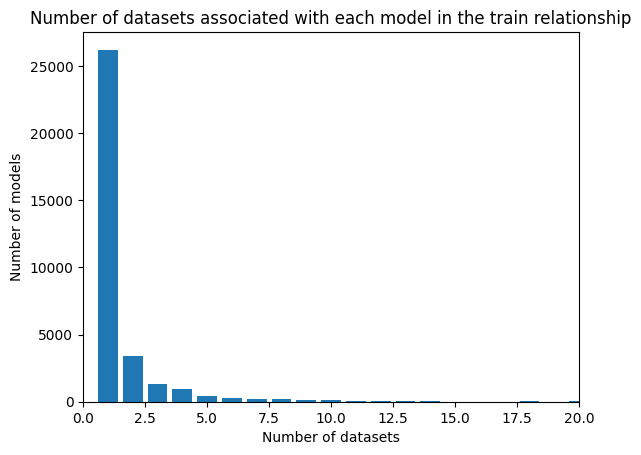

In [19]:
# Plot histogram of number of datasets associated with each model in the train relationship
plt.bar(counter_train.keys(), counter_train.values())
plt.xlabel('Number of datasets')
plt.ylabel('Number of models')
plt.title('Number of datasets associated with each model in the train relationship')
plt.xlim(0, 20)
plt.show()

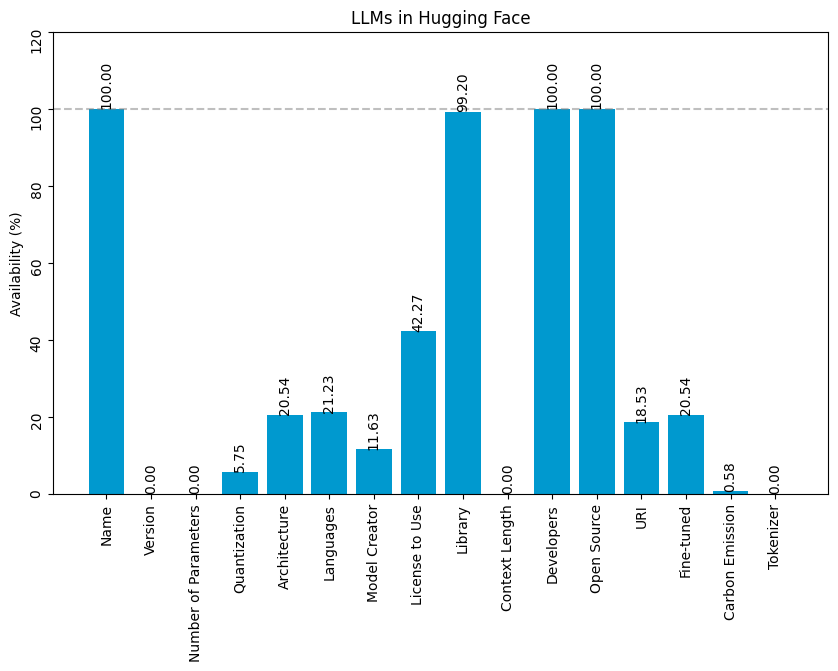

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
categories = ['Name','Version','Number of Parameters','Quantization','Architecture','Languages','Model Creator','License to Use',
              'Library','Context Length','Developers','Open Source','URI','Fine-tuned','Carbon Emission','Tokenizer']
percentages = [100.0,0.0,0.0,5.75,20.54,21.23,11.63,42.27,99.20,0.0,100.0,100.0,18.53,20.54,0.58,0.0]

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add a horizontal dashed line at y = 100
ax.axhline(y=100, color='gray', linestyle='--', alpha=0.5)

# Plot bars
bars = ax.bar(categories, percentages, color='#0099cf')

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center', rotation=90)

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)
plt.yticks(rotation=90)

# Set title and labels
ax.set_title('LLMs in Hugging Face')
ax.set_ylabel('Availability (%)')

plt.ylim(0, 120)

# Show plot
plt.show()


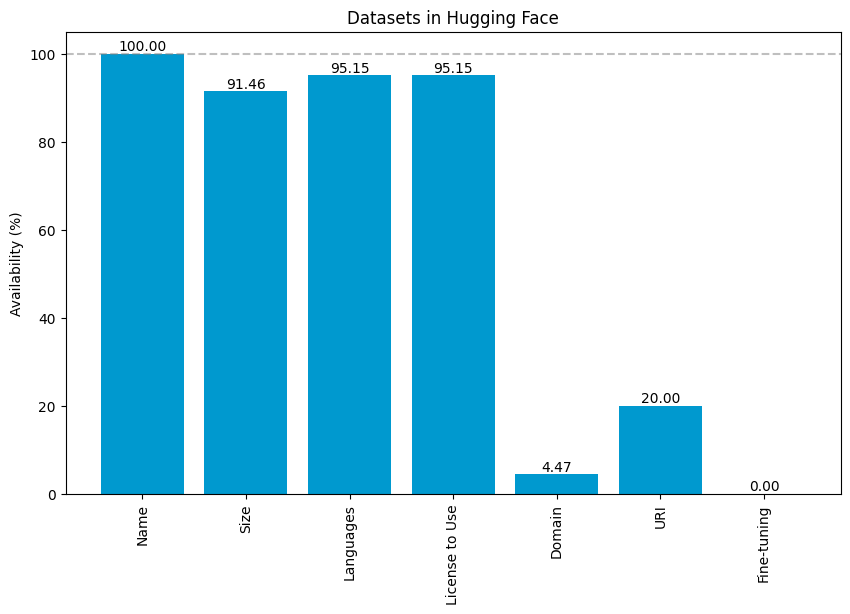

In [4]:
# Sample data
categories = ['Name','Size','Languages','License to Use','Domain','URI','Fine-tuning']
percentages = [100.0,91.46,95.15,95.15,4.47,20.0,0.0]

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add a horizontal dashed line at y = 100
ax.axhline(y=100, color='gray', linestyle='--', alpha=0.5)

# Plot bars
bars = ax.bar(categories, percentages, color='#0099cf')

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center')

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)

# Set title and labels
ax.set_title('Datasets in Hugging Face')
ax.set_ylabel('Availability (%)')

# Show plot
plt.show()

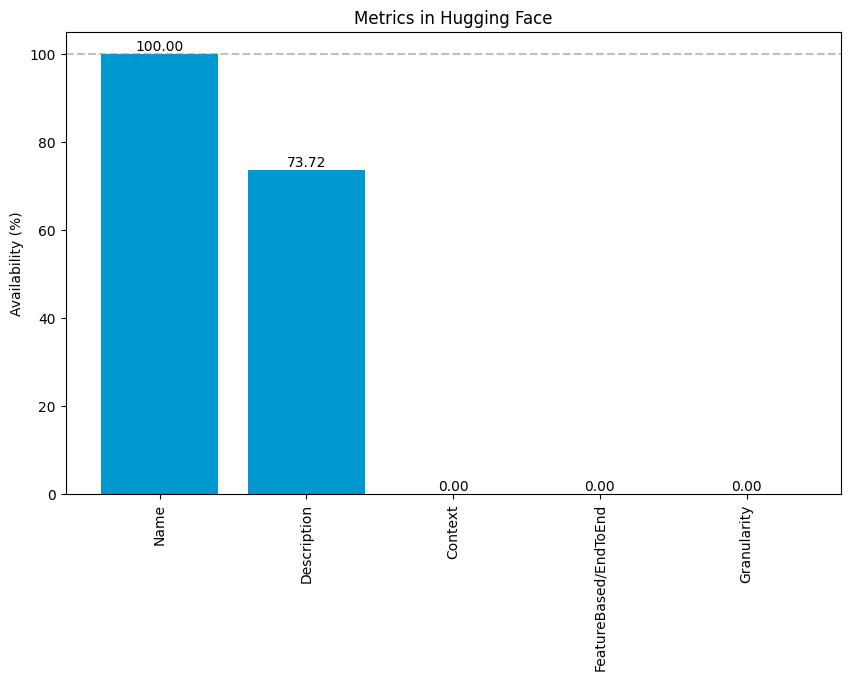

In [13]:
# Sample data
categories = ['Name','Description','Context','FeatureBased/EndToEnd','Granularity']
percentages = [100.00,73.72,0.0,0.0,0.0]

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add a horizontal dashed line at y = 100
ax.axhline(y=100, color='gray', linestyle='--', alpha=0.5)

# Plot bars
bars = ax.bar(categories, percentages, color='#0099cf')

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center')

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)

# Set title and labels
ax.set_title('Metrics in Hugging Face')
ax.set_ylabel('Availability (%)')

# Show plot
plt.show()